In [1]:
# Datensatz Airlines Delay
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "airlines_delay.csv"  # Replace with the actual filename

# Load the latest version
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df_airlines_delay.head())
df_airlines_delay.info()

<ipython-input-1-c5084883dbb9>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_airlines_delay = kagglehub.load_dataset(


100%|██████████| 5.85M/5.85M [00:01<00:00, 5.97MB/s]

Extracting zip of airlines_delay.csv...


First 5 records:    Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
0  2313.0  1296.0   141.0      DL         ATL       HOU          1      0
1  6948.0   360.0   146.0      OO         COS       ORD          4      0
2  1247.0  1170.0   143.0      B6         BOS       CLT          3      0
3    31.0  1410.0   344.0      US         OGG       PHX          6      0
4   563.0   692.0    98.0      FL         BMI       ATL          4      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  

In [ ]:
# Analysiere fehlende Werte (df.isnull().sum())

print(df_airlines_delay.isnull().sum())

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64


In [ ]:
# Suche nach doppelten Zeilen und lösche diese

print(df_airlines_delay.duplicated().sum())

df_airlines_delay.drop_duplicates(inplace=True)

216618


In [ ]:
# Zeige die Datentypen aller Spalten an
print(df_airlines_delay.dtypes)

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object


In [ ]:
# Lösche alle Zeilen, die nicht AA in Airline haben

df_airlines_delay = df_airlines_delay[df_airlines_delay['Airline'] == 'AA']
df_airlines_delay['Airline'].unique()

array(['AA'], dtype=object)

In [ ]:
print(df_airlines_delay.head())

    Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class
7   1300.0  1210.0    80.0      AA         DFW       MEM          3      0
89   550.0  1030.0   150.0      AA         LAS       DFW          7      0
92  1827.0  1030.0   225.0      AA         DFW       SMF          1      0
94   655.0   540.0   250.0      AA         JFK       STT          6      0
99  1822.0   875.0   130.0      AA         DFW       DAY          7      0


In [ ]:
# Datensatz Most Crowded Airports
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# The 'file_path' should contain the actual filename and extension.
file_path = "airports.csv"  # Replace 'airports.csv' with the actual filename if different.

# Load the latest version
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path,
)

print("First 5 records:", df_crowded_airports.head())

<ipython-input-11-f38bcd67bcf5>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_crowded_airports = kagglehub.load_dataset(


100%|██████████| 26.1k/26.1k [00:00<00:00, 27.2MB/s]

First 5 records:    Rank                                            Airport  \
0     1       China Guangzhou Baiyun International Airport   
1     2  United States Hartsfield–Jackson Atlanta Inter...   
2     3      China Chengdu Shuangliu International Airport   
3     4  United States Dallas/Fort Worth International ...   
4     5        China Shenzhen Bao'an International Airport   

                             Location        Country      Code  Passengers  \
0  Baiyun-Huadu, Guangzhou, Guangdong          China  CAN/ZGGG    43760427   
1                    Atlanta, Georgia  United States  ATL/KATL    42918685   
2   Shuangliu-Wuhou, Chengdu, Sichuan          China  CTU/ZUUU    40741509   
3            Dallas-Fort Worth, Texas  United States  DFW/KDFW    39364990   
4         Bao'an, Shenzhen, Guangdong          China  SZX/ZGSZ    37916059   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020  


In [ ]:
# Alle Flughafen von United States
#df_crowded_airports = df_crowded_airports[df_crowded_airports['Country'] == 'United States']
#print(df_crowded_airports.head())

In [ ]:
df_crowded_airports[['IATA', 'ICAO']] = df_crowded_airports['Code'].str.split('/', n=1, expand=True)

print(df_crowded_airports.head())

   Rank                                            Airport  \
0     1       China Guangzhou Baiyun International Airport   
1     2  United States Hartsfield–Jackson Atlanta Inter...   
2     3      China Chengdu Shuangliu International Airport   
3     4  United States Dallas/Fort Worth International ...   
4     5        China Shenzhen Bao'an International Airport   

                             Location        Country      Code  Passengers  \
0  Baiyun-Huadu, Guangzhou, Guangdong          China  CAN/ZGGG    43760427   
1                    Atlanta, Georgia  United States  ATL/KATL    42918685   
2   Shuangliu-Wuhou, Chengdu, Sichuan          China  CTU/ZUUU    40741509   
3            Dallas-Fort Worth, Texas  United States  DFW/KDFW    39364990   
4         Bao'an, Shenzhen, Guangdong          China  SZX/ZGSZ    37916059   

   Year IATA  ICAO  
0  2020  CAN  ZGGG  
1  2020  ATL  KATL  
2  2020  CTU  ZUUU  
3  2020  DFW  KDFW  
4  2020  SZX  ZGSZ  


In [ ]:
# Merge Passenger für 'AirportFrom'
merged_df_from = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportFrom', right_on='IATA', how='left')
df_airlines_delay['AirportFromCrowd'] = merged_df_from['Passengers']

# Merge Passenger für 'AirportTo'
merged_df_to = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportTo', right_on='IATA', how='left')
df_airlines_delay['AirportToCrowd'] = merged_df_to['Passengers']

print("First 5 records:", df_airlines_delay.head())

First 5 records:     Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class  \
7   1300.0  1210.0    80.0      AA         DFW       MEM          3      0   
89   550.0  1030.0   150.0      AA         LAS       DFW          7      0   
92  1827.0  1030.0   225.0      AA         DFW       SMF          1      0   
94   655.0   540.0   250.0      AA         JFK       STT          6      0   
99  1822.0   875.0   130.0      AA         DFW       DAY          7      0   

    AirportFromCrowd  AirportToCrowd  
7         48566803.0             NaN  
89        61623756.0             NaN  
92               NaN      69112607.0  
94               NaN      65670697.0  
99        53099282.0      58813103.0  


In [ ]:
# Berechne die Anzahl der eindeutigen Werte pro Spalte
unique_counts = df_airlines_delay.nunique()

print(unique_counts)

#ACHTUNG HIER FEHLEN VIELE FLUGHAFEN - wie sollen wir das machen?

Flight              1281
Time                 229
Length                98
Airline                1
AirportFrom           78
AirportTo             78
DayOfWeek              7
Class                  2
AirportFromCrowd      75
AirportToCrowd        76
dtype: int64


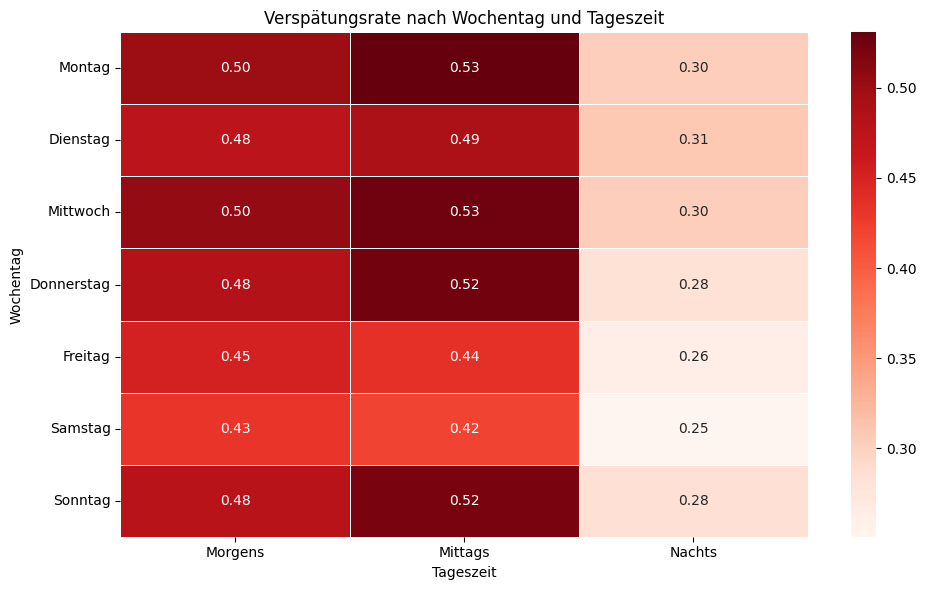

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kopie für Sicherheit
df = df_airlines_delay.copy()

# Schritt 1: Stunde aus der Spalte "Time" berechnen
df["Hour"] = df["Time"] // 100  # z.B. 1345 → 13

# Schritt 2: Tageszeit-Kategorie erstellen
def get_daypart(hour):
    if pd.isnull(hour):
        return "Unbekannt"
    elif 5 <= hour < 12:
        return "Morgens"
    elif 12 <= hour < 17:
        return "Mittags"
    elif 17 <= hour < 21:
        return "Abends"
    else:
        return "Nachts"

df["Tageszeit"] = df["Hour"].apply(get_daypart)

# Schritt 3: Wochentag benennen (statt 1–7 → Namen)
wochentage = {
    1: "Montag", 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag",
    5: "Freitag", 6: "Samstag", 7: "Sonntag"
}
df["Wochentag"] = df["DayOfWeek"].map(wochentage)

# Schritt 4: Pivot-Tabelle: Ø Verspätungsrate (Class = 1)
heatmap_data = df.pivot_table(
    index="Wochentag",
    columns="Tageszeit",
    values="Class",
    aggfunc="mean"
)

# Reihenfolge der Wochentage für Darstellung
reihenfolge = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]
heatmap_data = heatmap_data.reindex(reihenfolge)

# **Änderung hier:** Reihenfolge der Tageszeiten festlegen
heatmap_data = heatmap_data[["Morgens", "Mittags", "Nachts"]]

# Schritt 5: Heatmap visualisieren
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Verspätungsrate nach Wochentag und Tageszeit")
plt.xlabel("Tageszeit")
plt.ylabel("Wochentag")
plt.tight_layout()
plt.show()


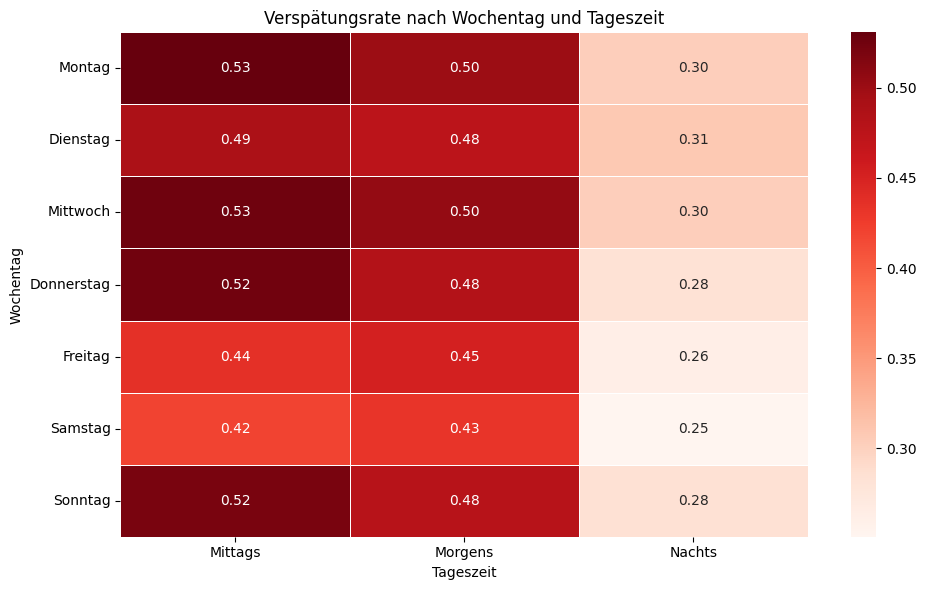

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kopie für Sicherheit
df = df_airlines_delay.copy()

# Schritt 1: Stunde aus der Spalte "Time" berechnen
df["Hour"] = df["Time"] // 100  # z.B. 1345 → 13

# Schritt 2: Tageszeit-Kategorie erstellen
def get_daypart(hour):
    if pd.isnull(hour):
        return "Unbekannt"
    elif 5 <= hour < 12:
        return "Morgens"
    elif 12 <= hour < 17:
        return "Mittags"
    elif 17 <= hour < 21:
        return "Abends"
    else:
        return "Nachts"

df["Tageszeit"] = df["Hour"].apply(get_daypart)

# Schritt 3: Wochentag benennen (statt 1–7 → Namen)
wochentage = {
    1: "Montag", 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag",
    5: "Freitag", 6: "Samstag", 7: "Sonntag"
}
df["Wochentag"] = df["DayOfWeek"].map(wochentage)

# Schritt 4: Pivot-Tabelle: Ø Verspätungsrate (Class = 1)
heatmap_data = df.pivot_table(
    index="Wochentag",
    columns="Tageszeit",
    values="Class",
    aggfunc="mean"
)

# Reihenfolge der Wochentage für Darstellung
reihenfolge = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]
heatmap_data = heatmap_data.reindex(reihenfolge)

# Schritt 5: Heatmap visualisieren
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Verspätungsrate nach Wochentag und Tageszeit")
plt.xlabel("Tageszeit")
plt.ylabel("Wochentag")
plt.tight_layout()
plt.show()


<ipython-input-28-9bd5e650c2cf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abflug_delay.head(10).index, y=abflug_delay.head(10).values, palette="Reds_r")


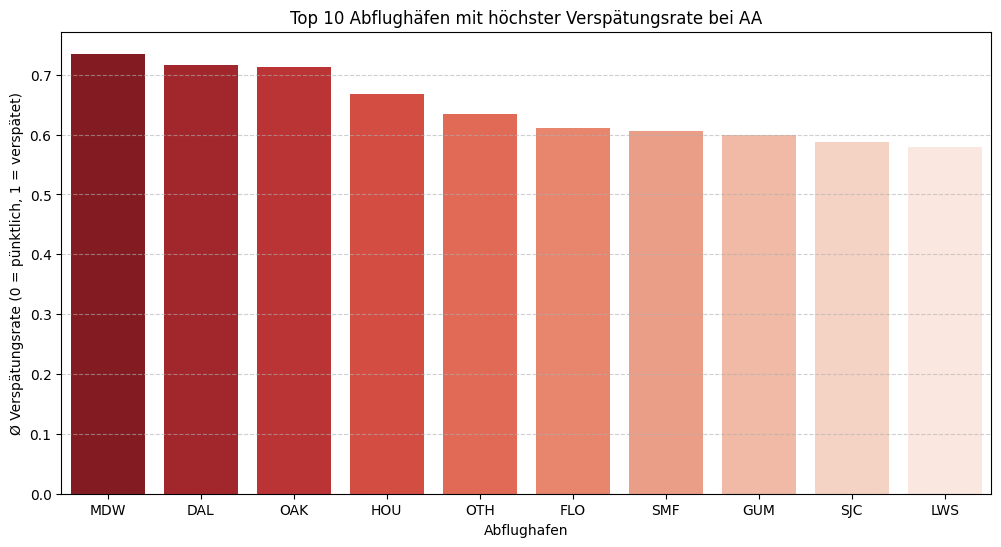

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kopie des AA-Datensatzes
df = df_airlines_delay.copy()

# Gruppieren nach Abflughafen (AirportFrom), Ø Verspätungsrate berechnen
abflug_delay = df.groupby("AirportFrom")["Class"].mean().sort_values(ascending=False)

# Top 10 Abflughäfen mit höchster Verspätungsrate
plt.figure(figsize=(12, 6))
sns.barplot(x=abflug_delay.head(10).index, y=abflug_delay.head(10).values, palette="Reds_r")
plt.title("Top 10 Abflughäfen mit höchster Verspätungsrate bei AA")
plt.xlabel("Abflughafen")
plt.ylabel("Ø Verspätungsrate (0 = pünktlich, 1 = verspätet)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


<ipython-input-29-bd2a2bc8bacf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ankunft_delay.head(10).index, y=ankunft_delay.head(10).values, palette="Blues_r")


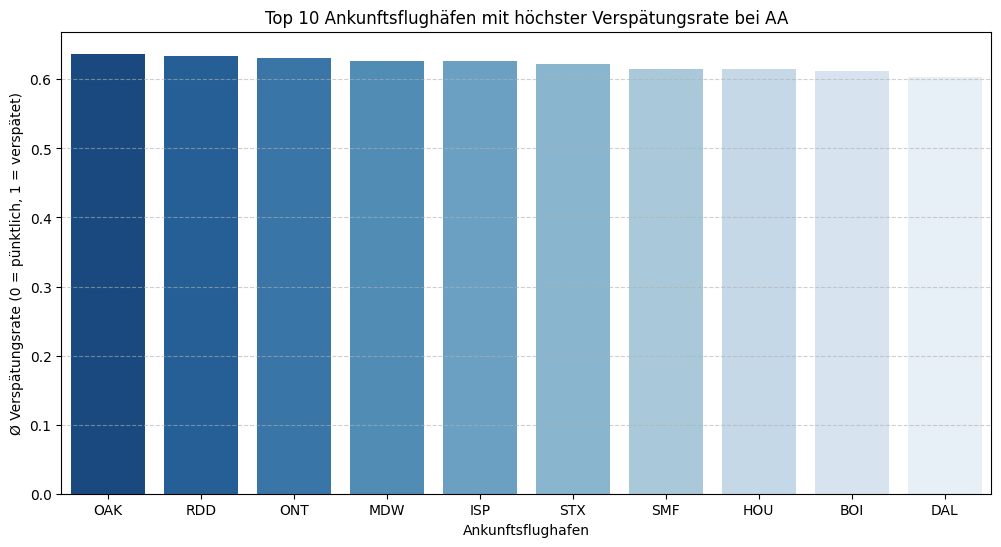

In [ ]:
# Gruppieren nach Ankunftsflughafen (AirportTo), Ø Verspätungsrate berechnen
ankunft_delay = df.groupby("AirportTo")["Class"].mean().sort_values(ascending=False)

# Top 10 Ankunftsflughäfen mit höchster Verspätungsrate
plt.figure(figsize=(12, 6))
sns.barplot(x=ankunft_delay.head(10).index, y=ankunft_delay.head(10).values, palette="Blues_r")
plt.title("Top 10 Ankunftsflughäfen mit höchster Verspätungsrate bei AA")
plt.xlabel("Ankunftsflughafen")
plt.ylabel("Ø Verspätungsrate (0 = pünktlich, 1 = verspätet)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# Anzahl Flüge + Verspätungsrate
df.groupby("AirportFrom")["Class"].agg(["count", "mean"]).sort_values("mean", ascending=False).head(10)

,count,mean
AirportFrom,,
MDW,7103,0.735182
DAL,3838,0.715998
OAK,3783,0.712926
HOU,4420,0.667195
OTH,93,0.634409
FLO,18,0.611111
SMF,3504,0.605879
GUM,10,0.600000
SJC,3357,0.587131
